# ĐỒ ÁN CUỐI KỲ

Họ tên: Huỳnh Công Sinh

MSSV: 1712724

**Giới thiệu**

Em thấy rằng trong những năm gần đây, những thảm họa thiên nhiên xuất hiện ngày càng nhiều. Không những thế, mức độ nghiêm trọng của nó cũng có dấu hiệu tăng lên. Do đó, ở trong đồ án cuối kỳ môn Lập trình cho Khoa học dữ liệu, em sẽ nghiên cứu về vấn đề này.

## Import

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Lấy dữ liệu

- Tài liệu nghiên cứu của em là file 'Disaster.csv'. File này tổng hợp các thảm họa thiên nhiên về địa lý, khí tượng, thủy văn, khí hậu. 
- Trong file này, địa điểm thu thập dữ liệu bao gồm có **châu Á** và **châu Đại Dương** từ năm **2000 đến nay**.

---

## Khám phá dữ liệu

### Đọc dữ liệu vào dataframe

In [3]:
disaster_df = pd.read_csv('disaster.csv', engine='python')
disaster_df.head(10)

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,2000-0372-CHN,2000,372,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Kill,...,30.0,43.0,10.0,NaN,31000.0,31010.0,NaN,NaN,19000.0,67.355759
1,2000-9186-AFG,2000,9186,Natural,Climatological,Drought,Drought,NaN,NaN,Affected,...,NaN,37.0,NaN,2580000.0,NaN,2580000.0,NaN,NaN,50.0,67.355759
2,2000-0373-BGD,2000,373,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Affect,...,24.0,11.0,50.0,200000.0,NaN,200050.0,NaN,NaN,NaN,67.355759
3,2000-0484-BTN,2000,484,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Kill,...,30.0,200.0,NaN,NaN,1000.0,1000.0,NaN,NaN,NaN,67.355759
4,2000-0677-CHN,2000,677,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Affect,...,18.0,10.0,NaN,200000.0,NaN,200000.0,NaN,NaN,25366.0,67.355759
5,2000-0920-CHN,2000,920,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Kill,...,5.0,26.0,NaN,NaN,4500.0,4500.0,NaN,NaN,5000.0,67.355759
6,2000-0472-CHN,2000,472,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,...,14.0,203.0,214.0,NaN,18000.0,18214.0,NaN,NaN,172000.0,67.355759
7,2000-9495-ARM,2000,9495,Natural,Climatological,Drought,Drought,NaN,NaN,Affected,...,NaN,NaN,NaN,297000.0,NaN,297000.0,NaN,NaN,100000.0,67.355759
8,2000-0097-AUS,2000,97,Natural,Meteorological,Storm,Tropical cyclone,NaN,Steve,Declar/Int,...,13.0,1.0,NaN,200.0,NaN,200.0,NaN,10000.0,90000.0,67.355759
9,2000-0283-BGD,2000,283,Natural,Meteorological,Storm,NaN,NaN,NaN,Kill,...,19.0,36.0,NaN,70000.0,1000.0,71000.0,NaN,NaN,NaN,67.355759


### Tổng quát về data

In [8]:
print('Shape:', disaster_df.shape)
disaster_df.info()

Shape: (3261, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           3261 non-null   object 
 1   Year                             3261 non-null   int64  
 2   Seq                              3261 non-null   int64  
 3   Disaster Group                   3261 non-null   object 
 4   Disaster Subgroup                3261 non-null   object 
 5   Disaster Type                    3261 non-null   object 
 6   Disaster Subtype                 2831 non-null   object 
 7   Disaster Subsubtype              237 non-null    object 
 8   Event Name                       609 non-null    object 
 9   Entry Criteria                   3260 non-null   object 
 10  Country                          3261 non-null   object 
 11  ISO                              3261 non-null   object 
 12  Re

Nhìn sơ qua df, ta thấy được df này có 3261 dòng, 43 cột tương ứng với 3261 disaster được ghi lại.
Một số cột quan trọng như:
- Disaster Subgroup: Tên nhóm.
- Disaster Type: Tên loại.
- Country: Nước xảy ra thảm họa.
- Region: Vùng miền nước đó thuộc về.
- Location: Địa điểm xảy ra trong nước.
- Start year, start month: thời gian xảy ra.
- Total Deaths: tổng số người chết hoặc mất tích.
- Total Damages: Tổng mức thiệt hại (đơn vị nghìn USD).

### Tổng số disaster theo từng năm

In [9]:
disaster_each_year = disaster_df['Year'].groupby(disaster_df['Year']).agg('count')
print(disaster_each_year)

Year
2000    163
2001    164
2002    162
2003    154
2004    162
2005    182
2006    190
2007    155
2008    150
2009    146
2010    145
2011    149
2012    147
2013    162
2014    151
2015    191
2016    159
2017    152
2018    146
2019    164
2020     67
Name: Year, dtype: int64


Từ Series disaster_each_year ở trên, ta vẽ một line plot để xem số lượng disater từng năm.

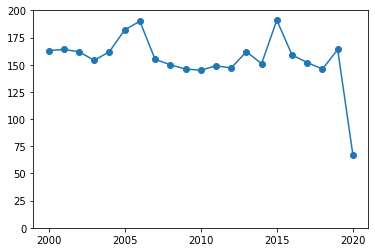

In [16]:
plt.plot(disaster_each_year,'o-')
plt.locator_params(integer=True)
plt.ylim((0, 200))
plt.show()

Ta thấy số lượng disaster ở năm 2020 thấp hơn hẳn so với trung bình các năm còn lại. Hãy xem dữ liệu của ta được record đến thời gian nào.

In [17]:
temp_df = disaster_df[['Start Month', 'Start Day']][disaster_df['Year'] == 2020]
latest_month = temp_df[temp_df['Start Month'] == temp_df['Start Month'].max()]
latest_record = latest_month[latest_month['Start Day'] == latest_month['Start Day'].max()]

print(latest_record)

      Start Month  Start Day
3259          7.0       22.0


Record mới nhất là vào 22/7, mới chỉ nửa năm nên số lượng thấp hơn nhiều so với các năm khác.

### Tỉ lệ xuất hiện của các loại thảm họa

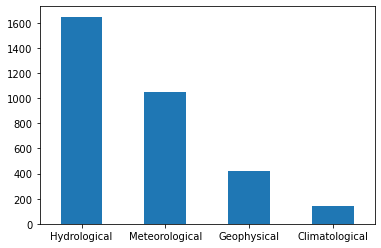

In [19]:
disaster_group_ratio = disaster_df['Disaster Subgroup'].value_counts()
disaster_ratio.plot.bar(rot=0)
plt.show()

Bar chart ở phía trên thể hiện cho tỉ lệ từng nhóm thảm họa. Ta sẽ vẽ thêm một bar chart để xem tỉ lệ của từng loại cụ thể.

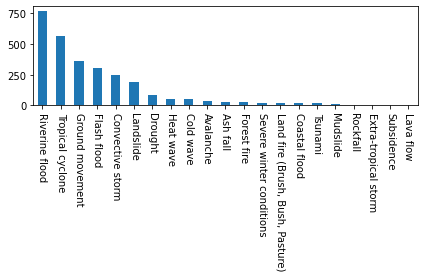

In [20]:
disaster_type_ratio = disaster_df['Disaster Subtype'].value_counts()
disaster_type_ratio.plot.bar(rot=270)
plt.tight_layout()
plt.show()

Vì từng nhóm thảm họa gồm có nhiều loại thảm họa khác nhau, nhưng 2 bar chart không cho ta được cái nhìn chung. Ta cần tìm cách gom nhóm 2 bar chart này lại.